# 3.1

In [5]:
import scipy.io as scipy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.linalg as lg
from make_cloud import *
#from boosteval import *
#from weakeval import *
from weaklearn import *
#from boostlearn import *

In [6]:
temp = make_cloud()
dat = pd.DataFrame(np.transpose(temp[0]), columns = ("X0", "X1"))
dat['t'] = temp[1]

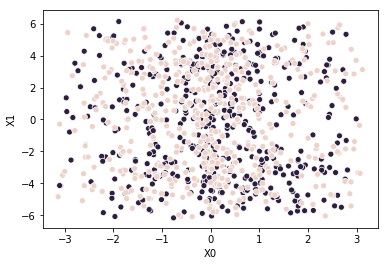

In [13]:
sns.scatterplot(x="X0", y="X1", hue="t",data=dat, legend = False)

In [8]:
X = temp[0]
t = temp[1]
M = 10

weights = np.repeat(1/np.size(t), np.size(t))

for i in range(M):
    params = weaklearn(X = X, t = t, v = weights)
    print(params)


[ 0.          1.         -2.21959048]
[ 0.          1.         -2.21959048]
[ 0.          1.         -2.21959048]
[ 0.          1.         -2.21959048]
[ 0.          1.         -2.21959048]
[ 0.          1.         -2.21959048]
[ 0.          1.         -2.21959048]
[ 0.          1.         -2.21959048]
[ 0.          1.         -2.21959048]
[ 0.          1.         -2.21959048]


In [39]:
X0b = X.transpose()[t==1]; #DATA IN CLASS 1
X1b = X.transpose()[t==-1]; #DATA IN CLASS -1

#if nargin == 2 ##nargin is matlab code for "number of arguments"
#    W0 = ones(size(X0,2),1);
#    W1 = ones(size(X1,2),1);
#else

if v is None:
    W0 = np.ones(X0b.shape[0]);
    W1 = np.ones(X1b.shape[0]);
else:
    W0 = v[t==+1];
    W1 = v[t==-1];

best_d = 1;
best_x = 0;
best_err = math.inf; #update python code to use inf value
is_01 = 1;


X = np.concatenate((X0b, X1b), axis =0)

W = np.concatenate((-W0, W1),axis=0); #i can't tell if this is what zosso did

#fixed up to here
#for d = 1:size(X0,1)  #If you call size(A, 1), size will return a scalar equal to the number of rows in A.
#so here we are going through the 500 iterations
#i would have guessed we loop through all obs...not just the ones in group 1

#okay but in this case we are supposed to grab the number 2

for d in range(1,X0b.shape[1]):

    #grab the dth row 
    #[~,IX] = sort(X(d,:)); ~ means logical "not" in matlab 

    IX = np.argsort(X[:,d]);

    err= np.cumsum(W[IX]) #err = cumsum(W(IX));

    min_cum = np.min(err);
    min_k   = np.argmin(err);
    best_01 = sum(W0)  + np.min(err); # + min_cum
    best_01_x = X[IX[min_k],d];

    err = np.cumsum(-W[IX]);        
    min_cum = np.min(err);
    min_k   = np.argmin(err);

    best_10 = sum(W1) + min_cum;
    best_10_x = X[IX[min_k],d];

    if best_01 < best_err:
        best_d = d;
        best_x = best_01_x;
        best_err = best_01;
        is_01 = 1;

    if best_10 < best_err:
        best_d = d;
        best_x = best_10_x;
        best_err = best_10;
        is_01 = 0;

beta = np.zeros(X0b.shape[1]);
beta[best_d] = 1;
params = np.append(beta, -best_x);
if is_01 == 0:
    params = params * -1;

IndexError: boolean index did not match indexed array along dimension 0; dimension is 2 but corresponding boolean dimension is 1000